In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('simplelinearregression.csv')

In [45]:
df.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [47]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

In [52]:
#feature scaling:
X = (X - X.mean())/X.std()

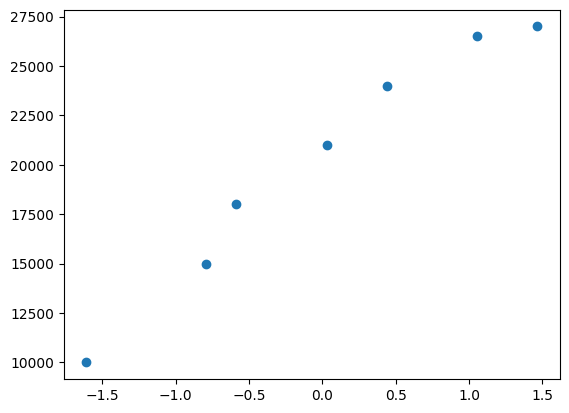

In [120]:
plt.scatter(X,Y)

In [111]:
class LinearRegression():
    
    def __init__(self, max_iter = 1000, learning_rate = 0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.loss_history = []
        
    def fit(self, X, Y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        
        for _ in range(self.max_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            
            #gradients
            
            dw = (1/n_samples)*(np.dot(X.T,(y_pred - Y)))
            db = (1/n_samples)*(np.sum(y_pred - Y))
                                
            #update the weights and bias
            
            self.weights = self.weights - (self.learning_rate * dw)
            self.bias = self.bias - (self.learning_rate * db)
                                
            loss = (1/(2*n_samples)) * (np.sum((y_pred - Y)**2))
            self.loss_history.append(loss)
                                
                                
    def predict(self, X):
        if X.ndim == 1:  #reshaping the array if it is 1D
            X = X.reshape(-1, 1)
        return np.dot(X, self.weights) + self.bias                       
                                                            
                                
    def plot_loss(self):
        plt.plot(self.loss_history)
        plt.title('training loss curve')
        plt.xlabel('iterations')
        plt.ylabel('loss')
        plt.show()
        
    def plot_regression_line(self):
       
        y_pred = model.predict(X)

        plt.scatter(X,Y, color = "blue", label = 'data points')
        plt.plot(X, y_pred, color = 'orange', label = 'regression line')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

In [112]:
model = LinearRegression()

In [113]:
model.fit(X,Y)

In [114]:
model.predict(X)

array([10997.81286143, 15689.39113332, 16862.28570129, 20380.96940521,
       22726.75854115, 26245.44224507, 28591.23138101])

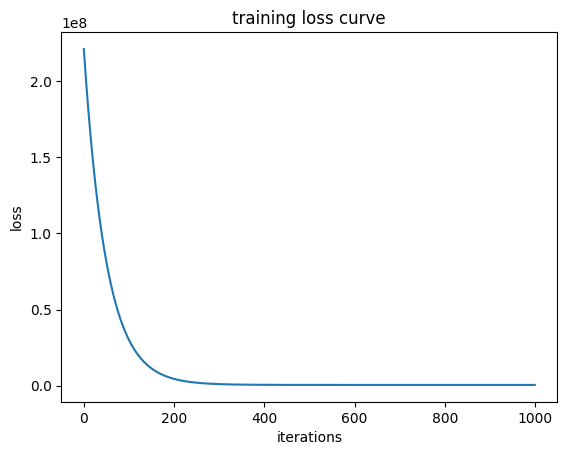

In [115]:
model.plot_loss()

In [116]:
print("model weights: " , model.weights)
print("model bias: " , model.bias)

model weights:  [5726.40890378]
model bias:  20213.413038355906


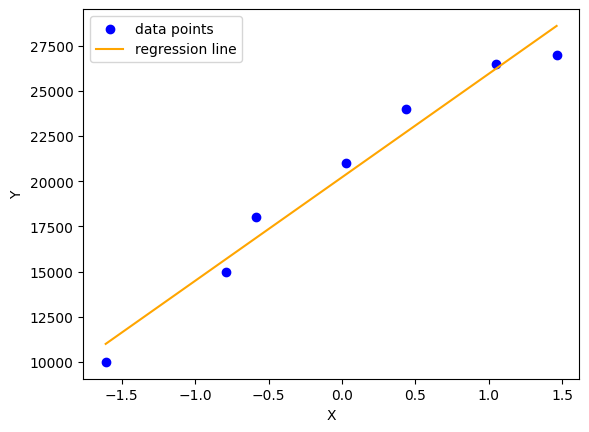

In [119]:
model.plot_regression_line()